In [5]:
import talk.config as con

% matplotlib inline

# environment variable for MOSEK
con.config_mosek()
con.config_configManager()
con.config_matplotlib()

Set MOSEKLM_LICENSE_FILE environment variable
Update ConfigManager


In [6]:
import numpy as np
pos = np.random.randn(1000,2)

In [7]:
from mosek.fusion import *

def two_norm(model, v):
    t = model.variable(1, Domain.greaterThan(0.0))
    model.constraint(Expr.vstack(t, v), Domain.inQCone())
    return t

def __abs(model, v):
    t = model.variable(int(v.size()), Domain.greaterThan(0.0))
    model.constraint(Expr.hstack(t, v), Domain.inQCone(int(v.size()), 2))
    return t

def infty_norm(model, v):
    t = __abs(model, v)
    m = model.variable(1, Domain.unbounded())
    model.constraint(Expr.sub(Variable.repeat(m,int(t.size())),t), Domain.greaterThan(0.0))
    return m

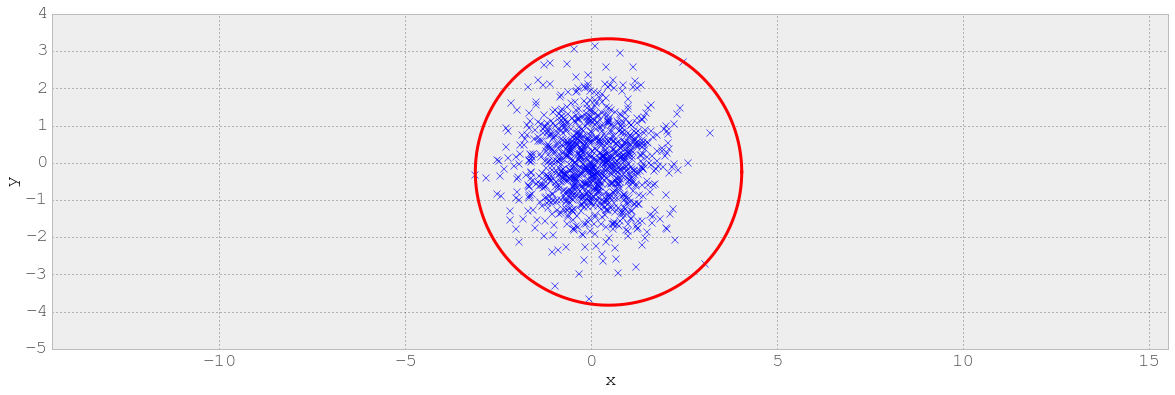

[ 0.46166639 -0.24683538]
3.58113818847


In [8]:
from mosek.fusion import *
    
with Model('center') as model:
    # variable for the center
    p = model.variable('p', 2, Domain.unbounded())
    # Distances for each point from the centre
    distances = Expr.vstack([two_norm(model, Expr.sub(Expr.constTerm(row),p)).asExpr() for row in pos])
    # max distance!
    m = infty_norm(model, distances)
    
    model.objective(ObjectiveSense.Minimize, m)
    model.solve()
    
    midpoint = np.array(p.level())
    radius = m.level()[0]
    
import math
c=np.array([[radius*np.cos(a)+midpoint[0], radius*np.sin(a)+midpoint[1]] for a in np.linspace(0,2*math.pi,1000)])

import matplotlib.pyplot as plt
plt.plot(c[:,0],c[:,1],'r')
plt.scatter(pos[:,0], pos[:,1],s=50,marker=u'x')
plt.xlabel('x'), plt.ylabel('y')
plt.axis('equal')
plt.show()
print(midpoint)
print(radius)